In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf

import os


In [ ]:
filname = 'drive/MyDrive/face_exp/fer2013.csv'
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
names=['emotion','pixels','usage']
df=pd.read_csv('drive/MyDrive/face_exp/fer2013.csv',names=names, na_filter=False)
im=df['pixels']
df.head(10)

,emotion,pixels,usage
0,emotion,pixels,Usage
1,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
3,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
4,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
5,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
6,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
7,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
8,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
9,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training


In [ ]:

import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2

num_features = 64
num_labels = 7
batch_size = 64
epochs = 100
width, height = 48, 48

In [ ]:
data = pd.read_csv('drive/MyDrive/face_exp//fer2013.csv')
datapoints = data['pixels'].tolist()

#getting features for training
X = []
for xseq in datapoints:
    xx = [int(xp) for xp in xseq.split(' ')]
    xx = np.asarray(xx).reshape(width, height)
    X.append(xx.astype('float32'))

X = np.asarray(X)
X = np.expand_dims(X, -1)

#getting labels for training


In [ ]:
y = pd.get_dummies(data['emotion']).to_numpy()

In [ ]:
#x = X
X -= np.mean(X, axis=0)

In [ ]:
X /= np.std(X, axis=0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=41)

In [ ]:
def get_model():
  model = Sequential()

  model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', input_shape=(width, height, 1), data_format='channels_last', kernel_regularizer=l2(0.01)))
  model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  model.add(Dropout(0.5))

  model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  model.add(Dropout(0.5))

  model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  model.add(Dropout(0.5))

  model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  model.add(Dropout(0.5))

  model.add(Flatten())

  model.add(Dense(2*2*2*num_features, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(2*2*num_features, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(2*num_features, activation='relu'))
  model.add(Dropout(0.5))

  model.add(Dense(num_labels, activation='softmax'))

  return model
#model.summary()

In [ ]:
model1= get_model()

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 23, 23, 128)       5

In [ ]:
X_train.shape, y_train.shape

((29068, 48, 48, 1), (29068, 7))

In [ ]:
model1.compile(loss=categorical_crossentropy,
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])

#training the model


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
es = EarlyStopping(monitor='val_accuracy', patience = 2, min_delta=0.01, verbose=1)

In [ ]:
model1.fit(np.array(X_train), np.array(y_train),
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(np.array(X_valid), np.array(y_valid)),
          # callbacks=[es],
          shuffle=True)

Epoch 1/100
455/455 [==============================] - 42s 92ms/step - loss: 1.1593 - accuracy: 0.5743 - val_loss: 1.1065 - val_accuracy: 0.5935
Epoch 2/100
455/455 [==============================] - 42s 92ms/step - loss: 1.1365 - accuracy: 0.5830 - val_loss: 1.1074 - val_accuracy: 0.6003
Epoch 3/100
455/455 [==============================] - 42s 92ms/step - loss: 1.1162 - accuracy: 0.5921 - val_loss: 1.0986 - val_accuracy: 0.5929
Epoch 4/100
455/455 [==============================] - 42s 92ms/step - loss: 1.0988 - accuracy: 0.6019 - val_loss: 1.0848 - val_accuracy: 0.6087
Epoch 5/100
455/455 [==============================] - 42s 92ms/step - loss: 1.0690 - accuracy: 0.6152 - val_loss: 1.0732 - val_accuracy: 0.6139
Epoch 6/100
455/455 [==============================] - 42s 92ms/step - loss: 1.0522 - accuracy: 0.6237 - val_loss: 1.0432 - val_accuracy: 0.6121
Epoch 7/100
455/455 [==============================] - 42s 92ms/step - loss: 1.0227 - accuracy: 0.6306 - val_loss: 1.0387 - val_ac

In [ ]:
from keras.models import load_model 
model1.save("drive/MyDrive/face_exp/cnn_network.h5") 
loaded_model = load_model("drive/MyDrive/face_exp/cnn_network.h5")  

In [ ]:
objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
# y_pos = np.arange(len(objects))
# print(y_pos)

# def emotion_analysis(emotions):
#     objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
#     y_pos = np.arange(len(objects))
#     plt.bar(y_pos, emotions, align='center', alpha=0.9)
#     plt.tick_params(axis='x', which='both', pad=10,width=4,length=10)
#     plt.xticks(y_pos, objects)
#     plt.ylabel('percentage')
#     plt.title('emotion')
    
# plt.show()



In [ ]:
img = Image.open(im_file)
img = img.convert('RGB')

In [ ]:
from skimage import io
from keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/Image Document/ghultu 1.jpg', color_mode="grayscale", target_size=(48, 48))
show_img=image.load_img('/content/drive/MyDrive/Image Document/ghultu 1.jpg',  target_size=(200, 200))
x = image.img_to_array(img)


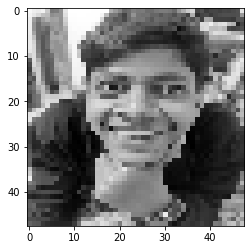

In [ ]:
plt.gray()
plt.imshow(img)
plt.show()

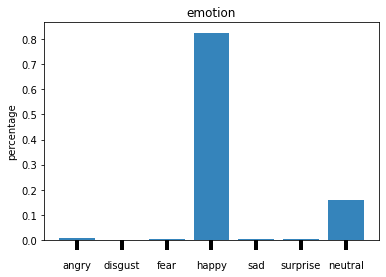

In [ ]:
x = np.expand_dims(x, axis = 0)

x /= 255

custom = loaded_model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48])

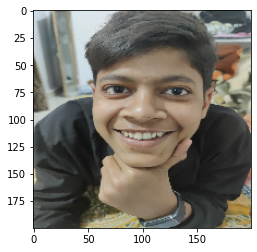

Expression Prediction: happy


In [ ]:


# x /= 255


plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])